In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Configuration settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.style.use('default')
sns.set_palette('husl')

In [2]:
df = pd.read_csv('/content/aerofit_treadmill_data.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [5]:
df.shape

(180, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
  df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

,0
Product,3
Age,32
Gender,2
Education,8
MaritalStatus,2
Usage,6
Fitness,5
Income,62
Miles,37


**Univariate Analysis(Numerical)**

In [10]:
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print(f'{(len(num_cols))} : {num_cols}')

6 : ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']


In [11]:
df[num_cols].describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


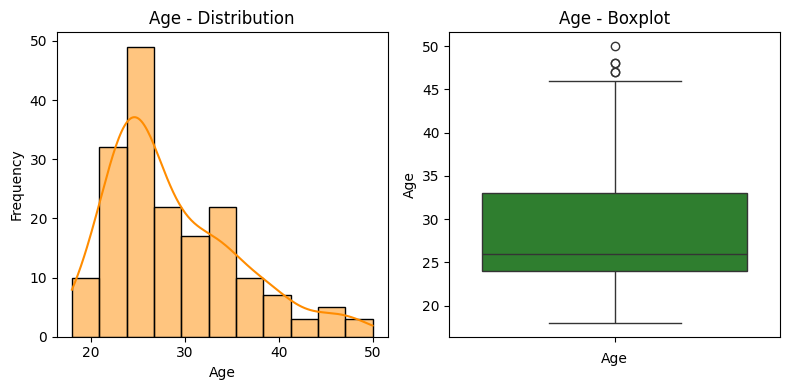

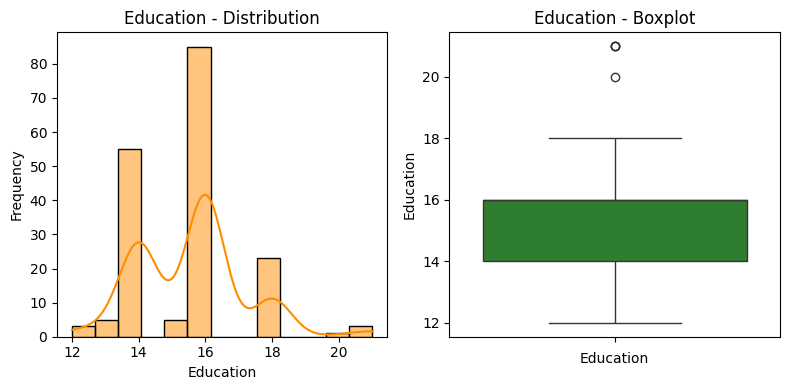

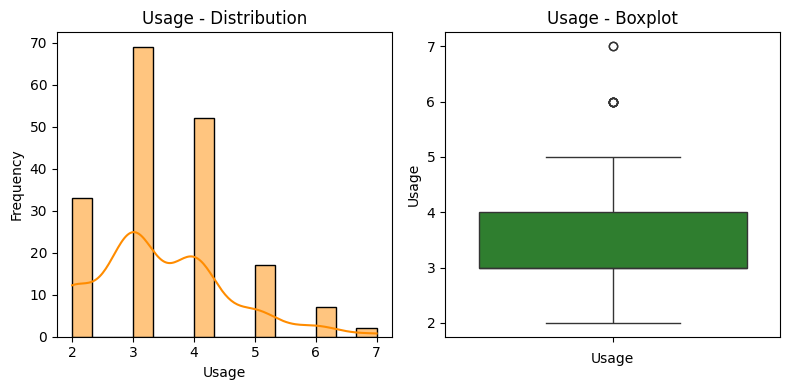

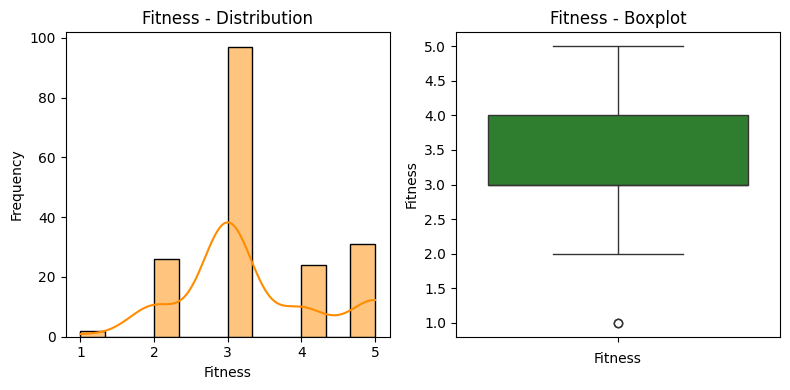

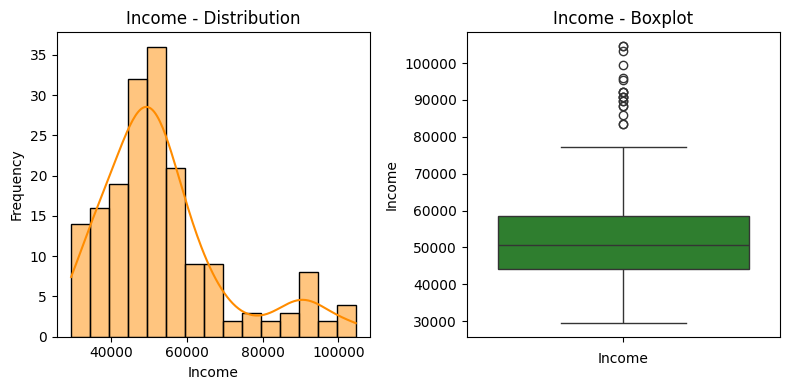

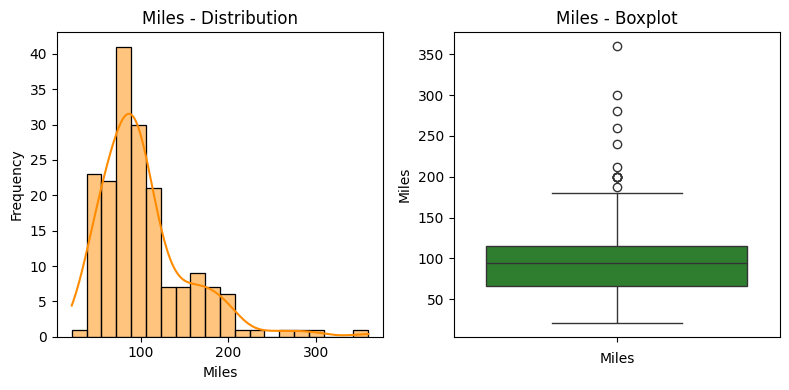

In [12]:
for col in num_cols:
  fig,axes = plt.subplots(1,2,figsize=(8,4))
  #Left:Histogram
  sns.histplot(df[col],ax=axes[0],color='darkorange',kde=True)
  axes[0].set_title(f'{col} - Distribution')
  axes[0].set_xlabel(col)
  axes[0].set_ylabel('Frequency')
  #Right:Boxplot
  sns.boxplot(df[col],ax=axes[1],color='forestgreen')
  axes[1].set_title(f'{col} - Boxplot')
  axes[1].set_xlabel(col)
  plt.tight_layout()
  plt.show()

**Observation:**

Age, Education, and Usage have very few outliers.

Both Miles and Income have significant outliers based on the above distribution.

Also Miles and Income are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.

Customer with fitness level 3 buy a major chuck of treadmills.

Majority of Customers fall within the $ 45,000 - $ 60,000 income range.

**Univariate Analysis (Count plot)**



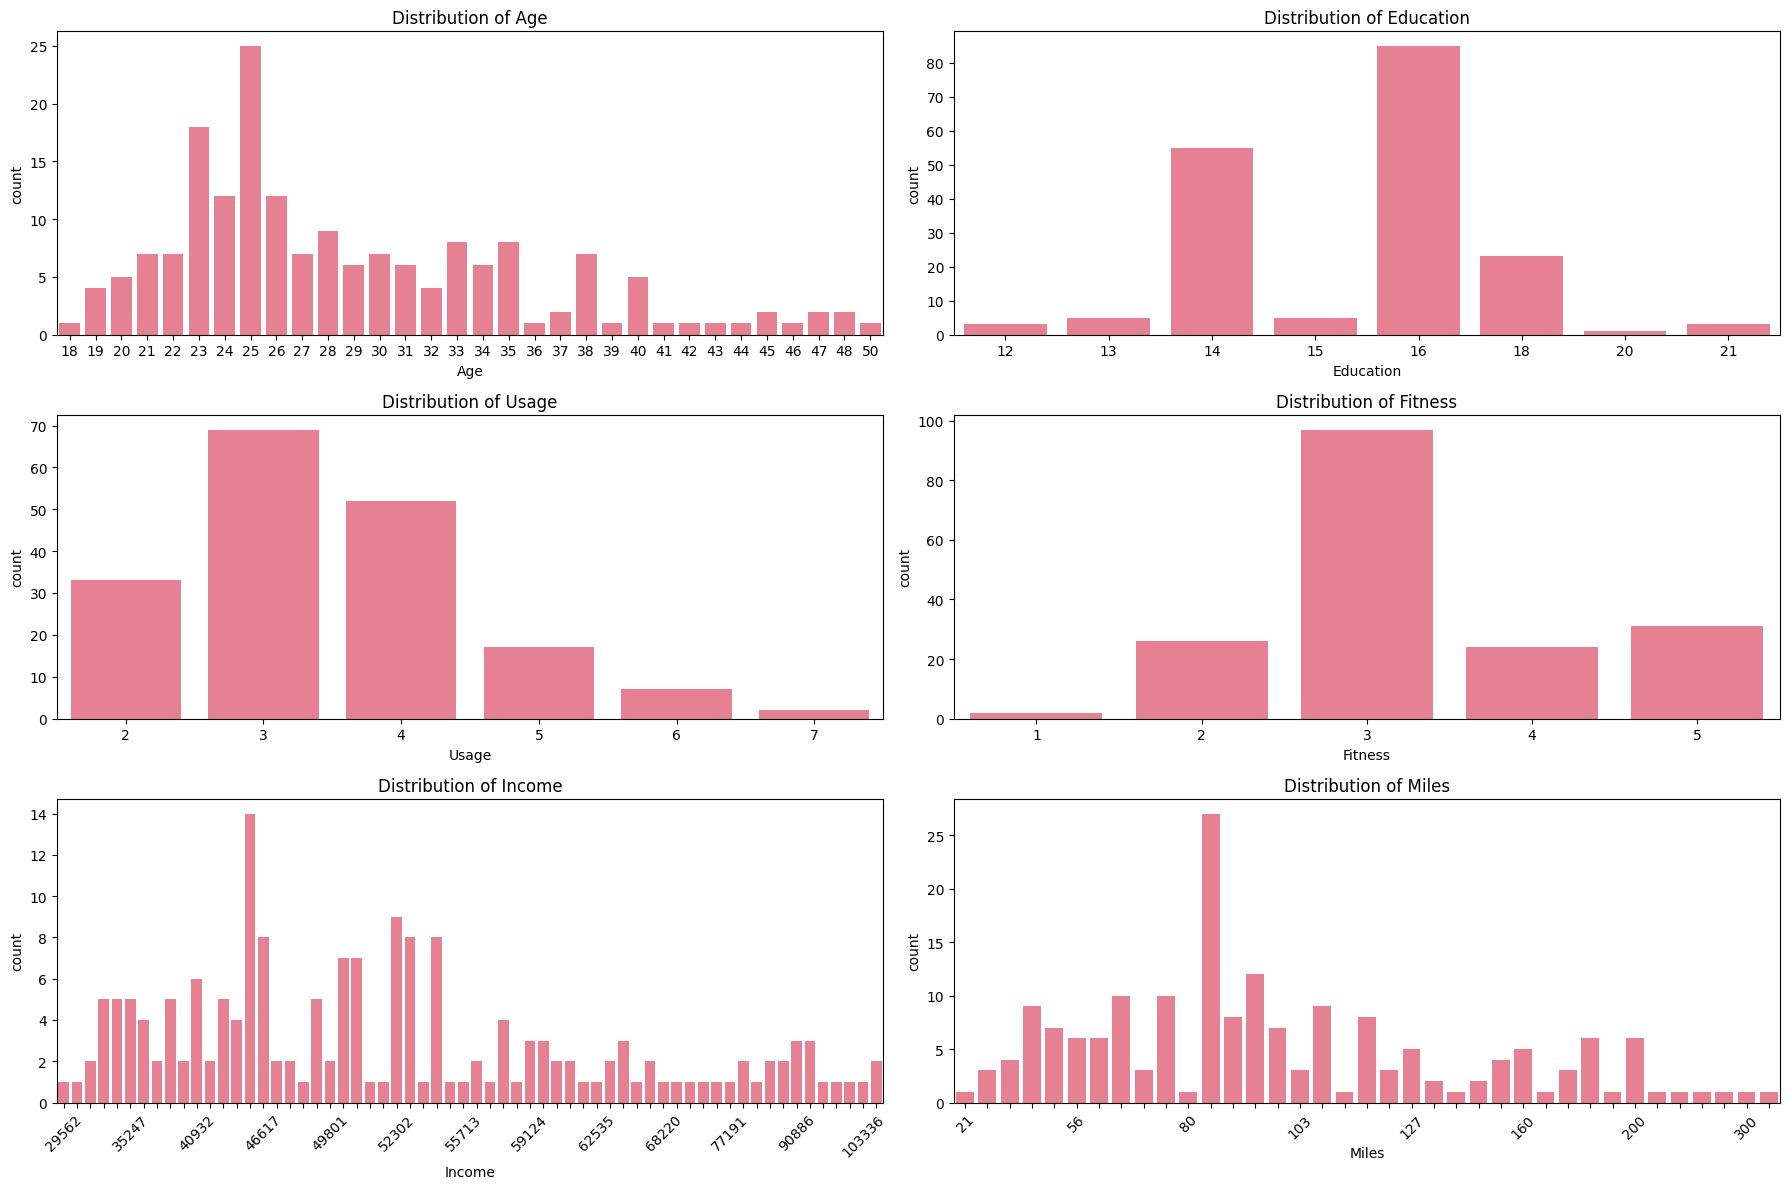

In [44]:
fig, axes = plt.subplots(3, 2, figsize=(18, 12))

for ax, col in zip(axes.flatten(), num_cols):
    sns.countplot(data=df, x=col,ax=ax)
    ax.set_title(f"Distribution of {col}")
    plt.draw()   # force rendering so tick labels exist

#Show only every 5th label for Income and Miles
for ax in [axes[2,0], axes[2,1]]:
    labels = ax.get_xticklabels()
    for i, label in enumerate(labels):
        if i % 5 != 0:
            label.set_visible(False)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Observation:**

Young people at age of 25 are more conscious about health and are using treadmills more than old aged people.

**Univariate Analysis(Categorical)**

In [13]:
cat_cols = df[['Product','Gender','MaritalStatus','Education','Usage','Fitness']]

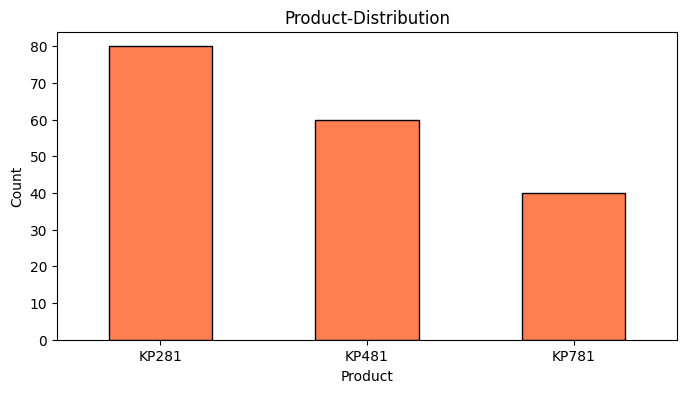

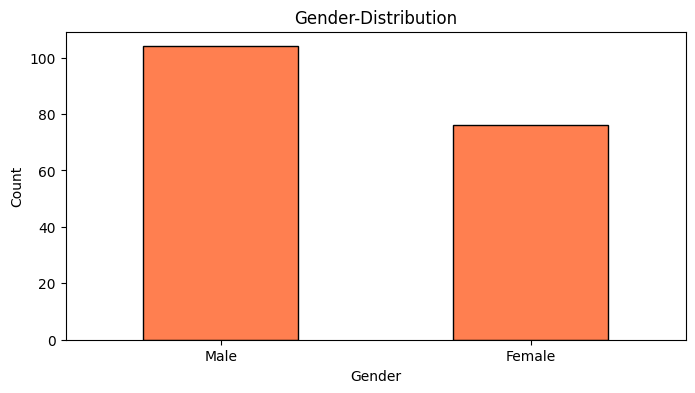

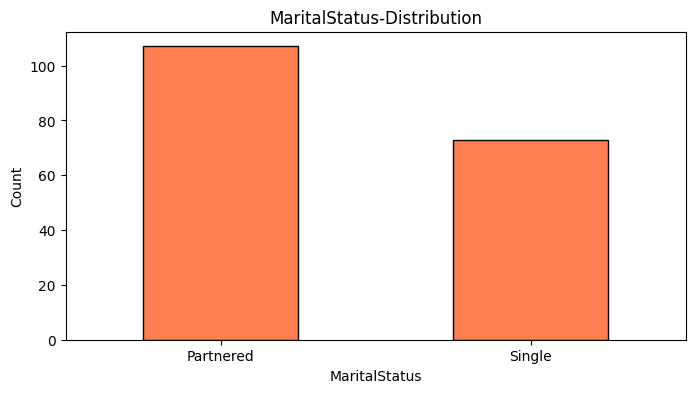

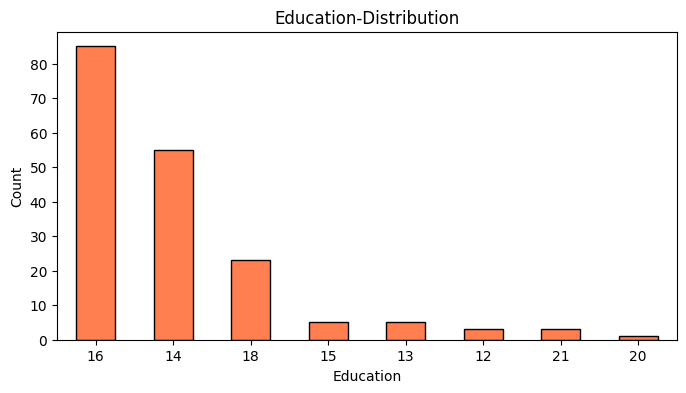

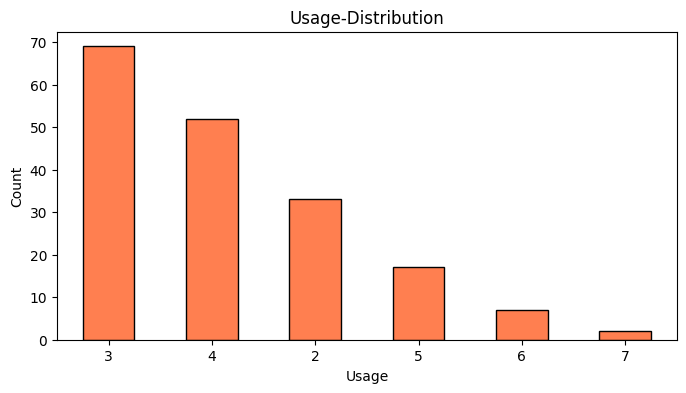

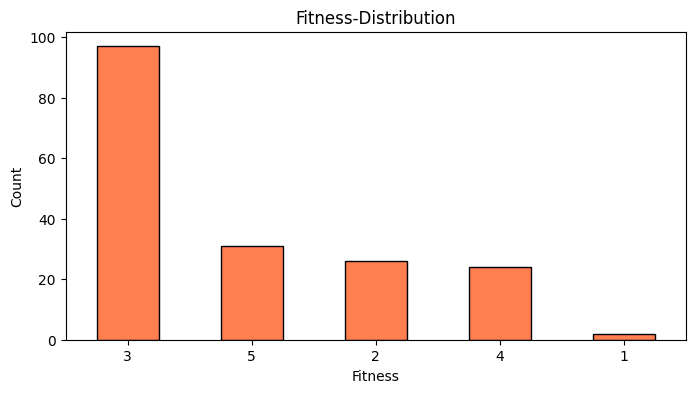

In [14]:
for col in cat_cols:
  plt.figure(figsize=(8,4))
  df[col].value_counts().plot(kind='bar',color='coral',edgecolor='black')
  plt.title(f'{col}-Distribution')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=360)
  plt.show()

**Observation:**

KP281 is the most frequent product and best-selling product.

In Gender, there are more Males who are using treadmills than Females.

The treadmills are more likely to be purchased by partnered people

**Bivariate Analysis**


**Product [Target] vs Features**

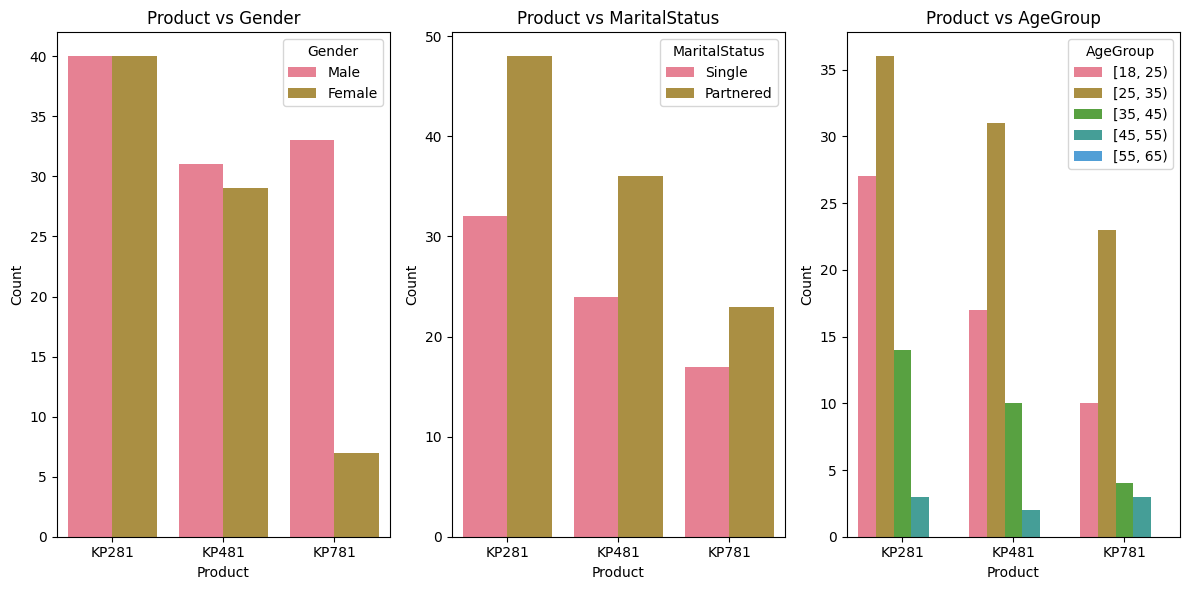

In [71]:
# Binning age
df['AgeGroup'] = pd.cut(df['Age'], bins=[18,25,35,45,55,65], right=False)

feature_cols = ['Gender', 'MaritalStatus', 'AgeGroup']

fig, axes = plt.subplots(1,3, figsize=(12,6))

for ax, col in zip(axes, feature_cols):
    sns.countplot(data=df, x='Product', hue=col, ax=ax)
    ax.set_title(f'Product vs {col}')
    ax.set_xlabel('Product')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Obervations**

**Product vs Gender**

Equal number of males and females have purchased KP281 product and Almost same for the product KP481

Most of the Male customers have purchased the KP781 product.

**Product vs MaritalStatus**

Customer who is Partnered, is more likely to purchase the product.

**Age vs Product**

Customers with age of 25 are more likely to purchase the KP481 product.

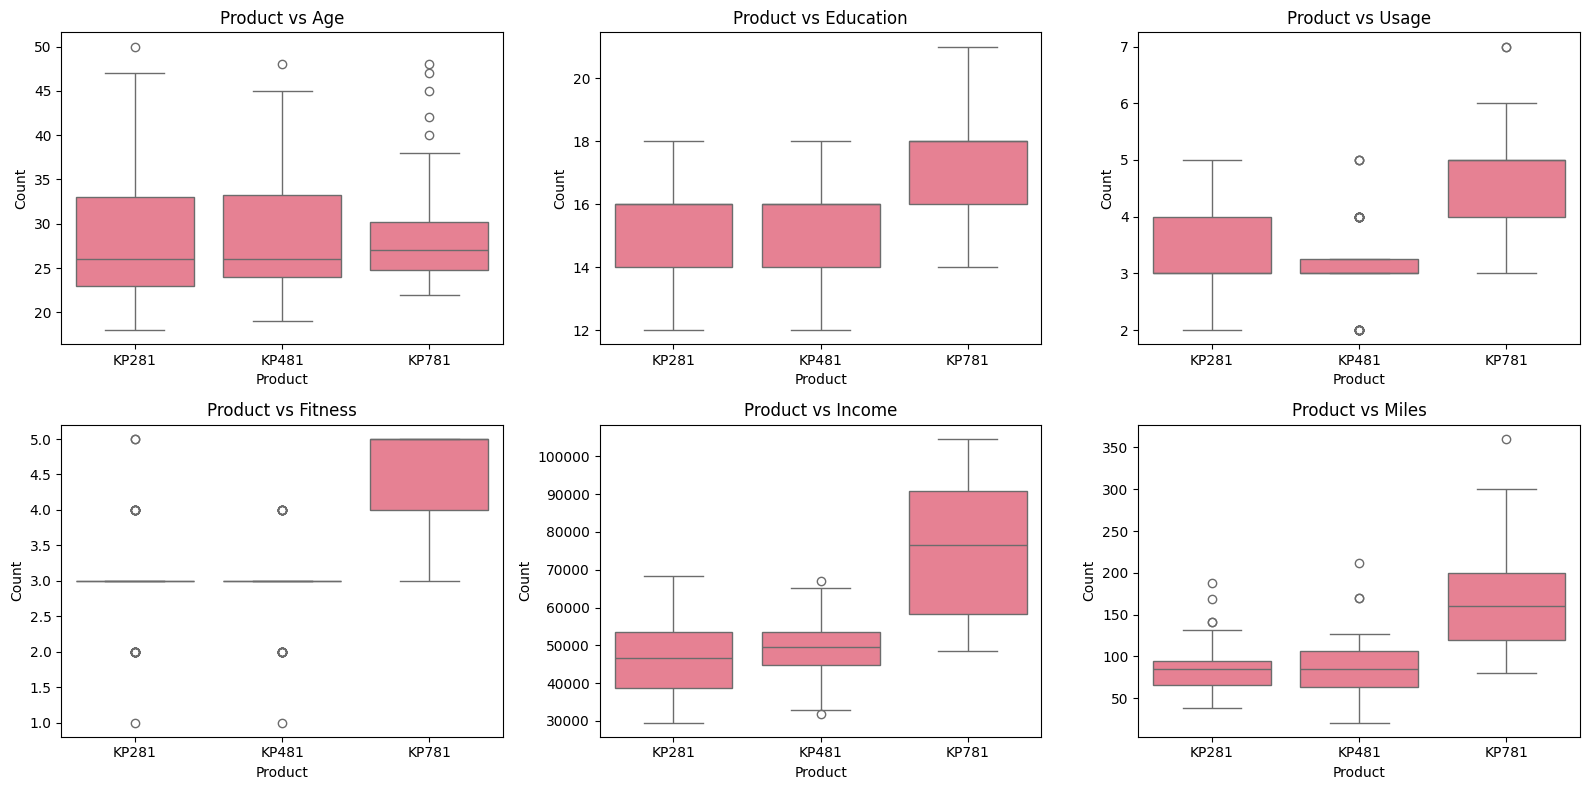

In [76]:
attribute_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

fig, axes = plt.subplots(2, 3, figsize=(16,8))

count = 0
for ax, col in zip(axes.flatten(), attribute_cols):
    sns.boxplot(data=df, x='Product', y=col, ax=ax)
    ax.set_title(f'Product vs {col}')
    ax.set_xlabel('Product')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Observation:**

**Product vs Age**

Customers purchasing products KP281 & KP481 are having same Age median value.

Customers whose age lies between 25-30, are more likely to buy the KP781 product

**Product vs Education**

Customers whose Education is greater than 16, have more chances to purchase the KP781 product.

While the customers with Education less than 16 have equal chances of purchasing KP281 or KP481.

**Product vs Usage**

Customers who are planning to use the treadmill greater than 4 times a week, are more likely to purchase the KP781 product.

While the other customers are likely to purchase KP281 or KP481.

**Product vs Fitness**

The more the customer is fit (fitness >= 3), the higher the chances of the customer purchasing the KP781 product.

**Product vs Income**

The higher the Income of the customer (Income >= 60000), the higher the chances of the customer purchasing the KP781 product.

**Product vs Miles**

If the customer expects to walk/run greater than 120 Miles per week, it is more likely that the customer will buy the KP781 product.

**Multivariate Analysis**

In [ ]:
gender_attrs = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
gender_by_product_fig, gender_by_product_axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
gender_by_product_fig.subplots_adjust(top=1.3)

attr_index = 0
for grid_row in range(3):
    for grid_col in range(2):
        sns.boxplot(data=aerofit_df, x='Gender', y=gender_attrs[attr_index], hue='Product', ax=gender_by_product_axes[grid_row, grid_col])
        gender_by_product_axes[grid_row, grid_col].set_title(f"Product vs {gender_attrs[attr_index]}", pad=12, fontsize=13)
        attr_index += 1

plt.show()

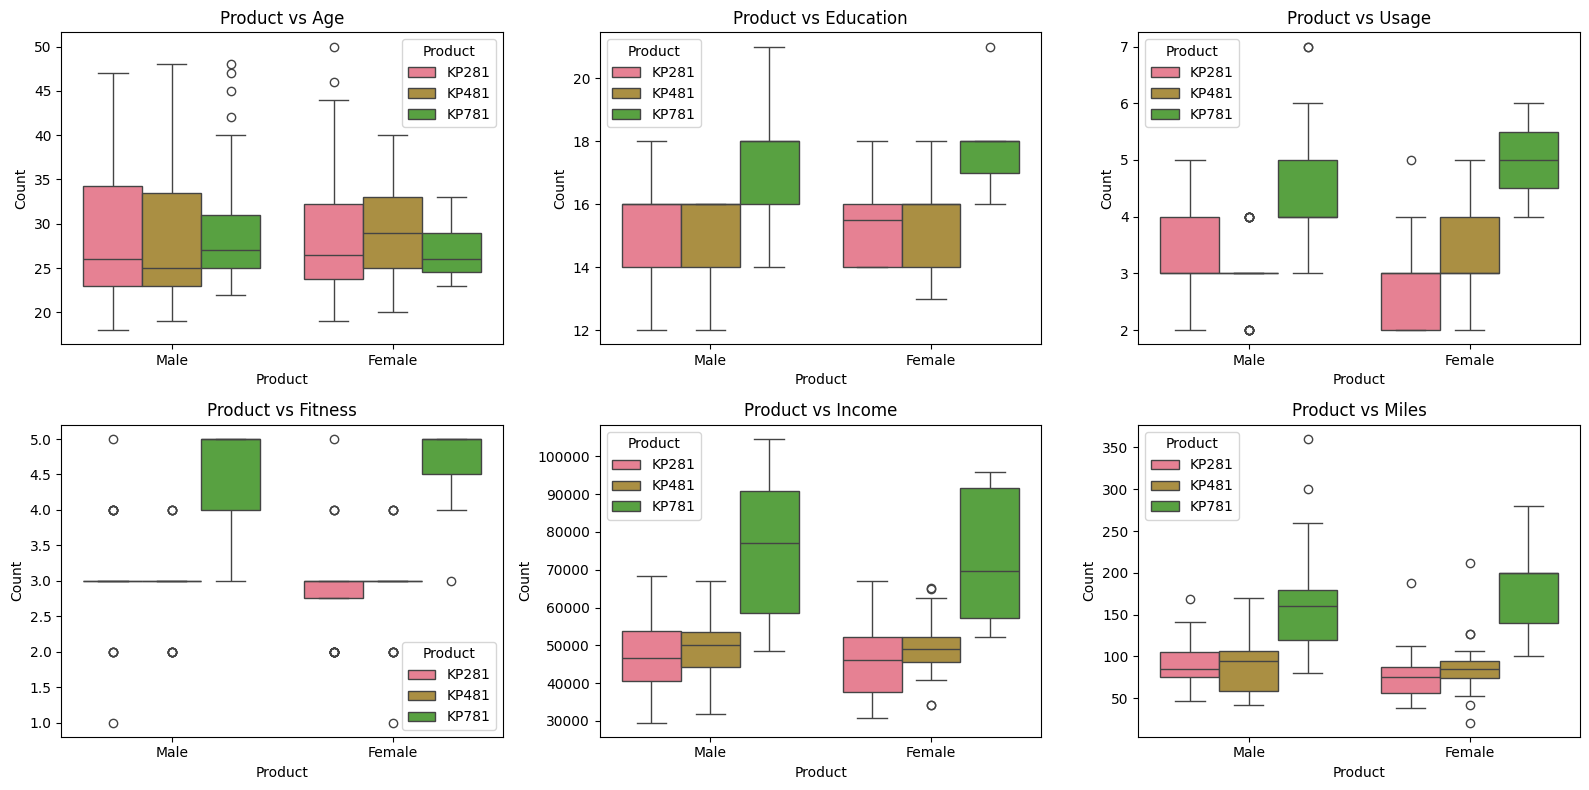

In [75]:
fig, axes = plt.subplots(2, 3, figsize=(16,8))

count = 0
for ax, col in zip(axes.flatten(), attribute_cols):
    sns.boxplot(data=df, x='Gender', y=col, hue = 'Product',ax=ax)
    ax.set_title(f'Product vs {col}')
    ax.set_xlabel('Product')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

**Obervations**

Females planning to use the treadmill 3-4 times a week, are more likely to buy the KP481 product

Correlation Analysis

In [15]:
corr_matrix = df[num_cols].corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


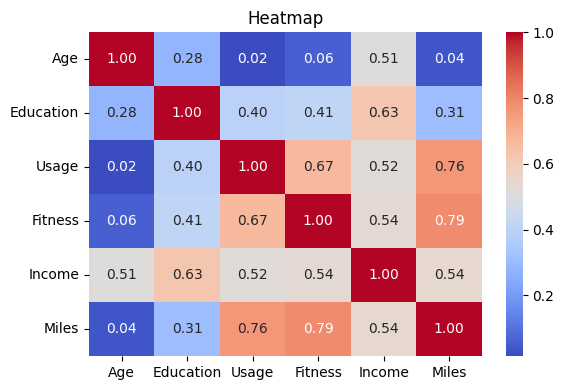

In [16]:
#Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Heatmap')
plt.tight_layout()
plt.show()

**Observations:**

(Miles & Fitness) and (Miles & Usage) attributes are highly correlated, which means if a customer's fitness level is high they use more treadmills.

Income and Education shows a strong correlation. High-income and highly educated people prefer the KP781 treadmill which is having advanced features.

There is no correlation between (Usage & Age) or (Fitness & Age) attributes, which mean Age should not be a barrier to using treadmills or specific model of treadmills.

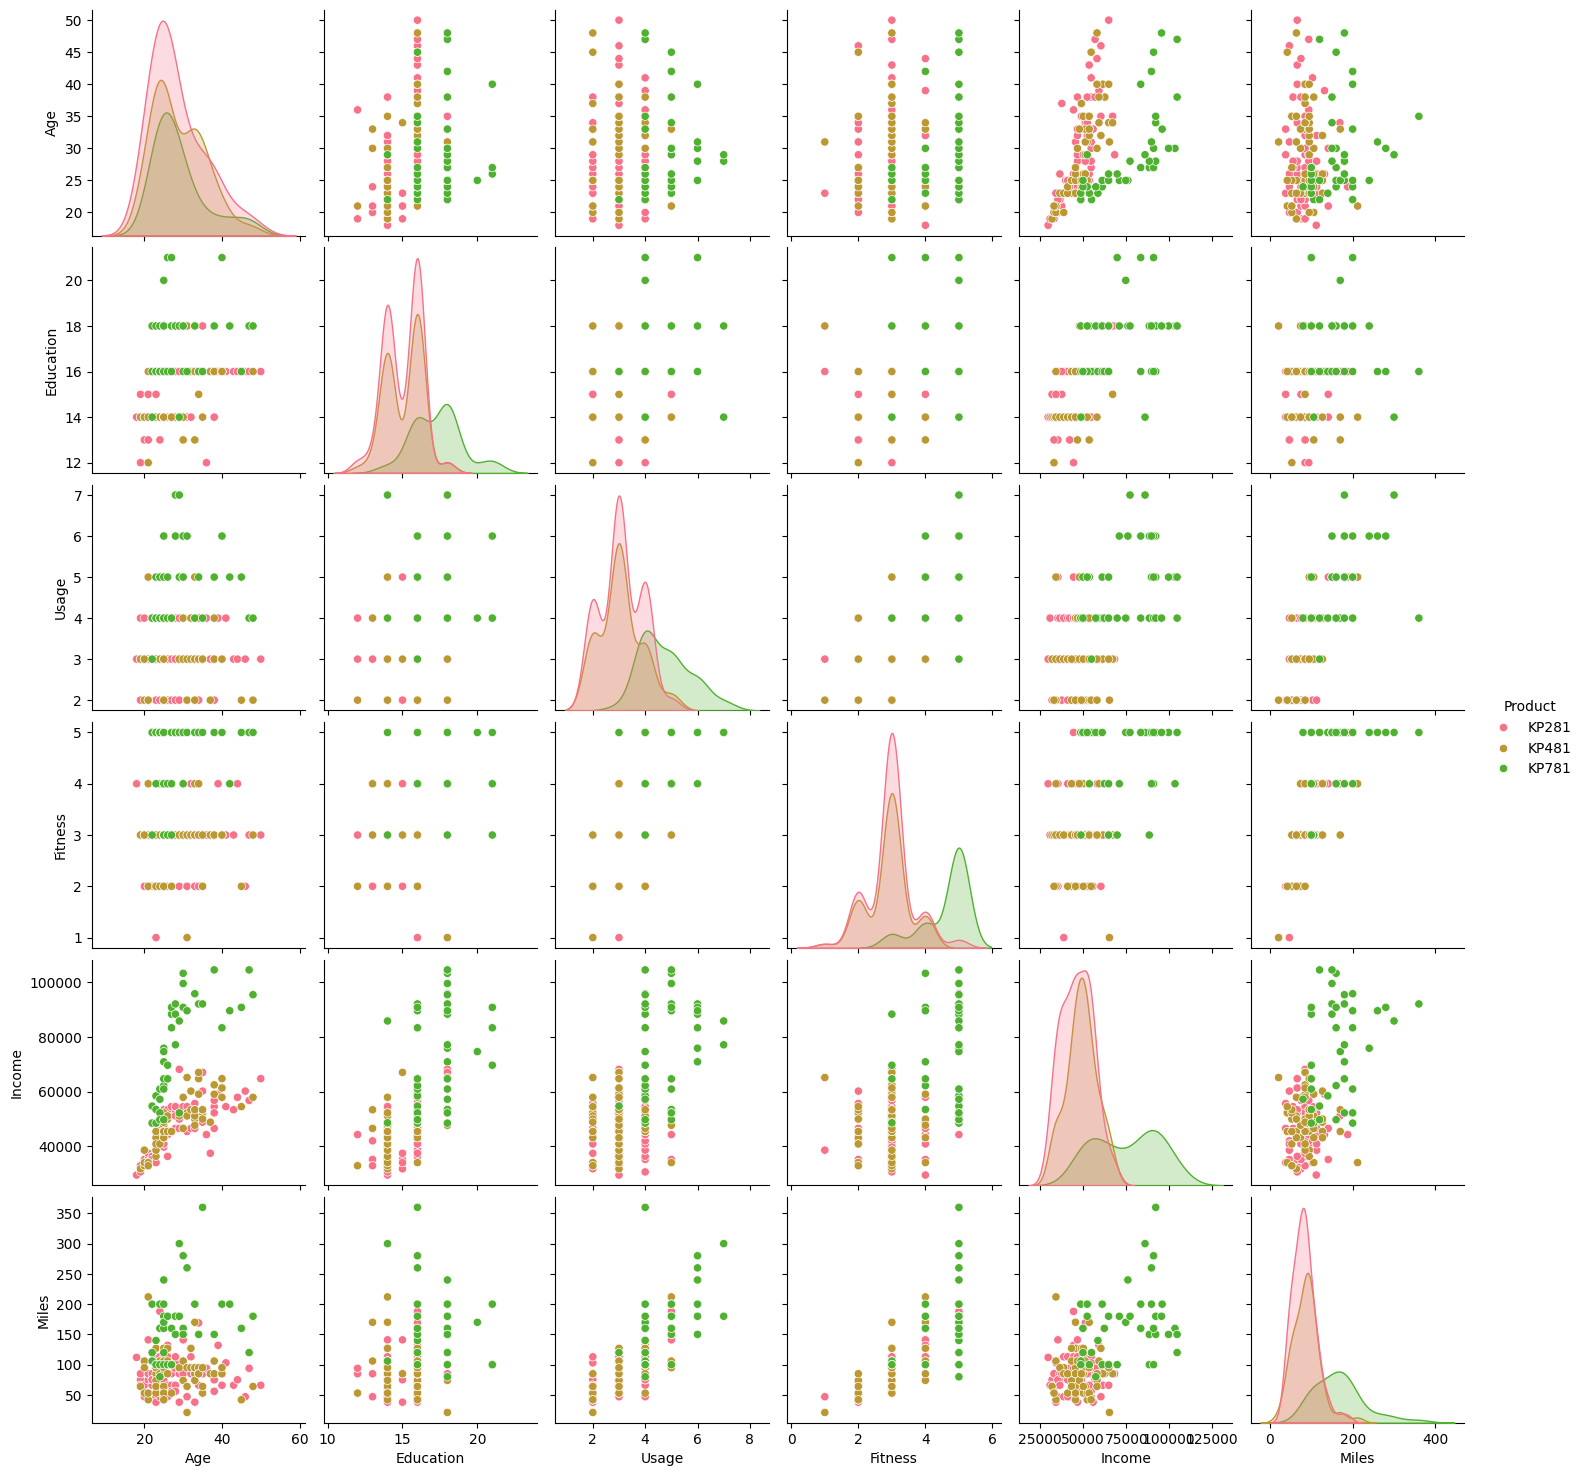

In [79]:
sns.pairplot(df, hue = "Product")
plt.show()

Profile Analysis

In [25]:
advanced = df[df['Product'] == 'KP781']
print('Profile of Customers buying Advanced machines')
print(f'Avg age : {advanced['Age'].mean():.1f}')
print(f'Most common Gender : {advanced['Gender'].mode()[0]}')
print(f'Most common Education Years : {advanced['Education'].mode()[0]}')
print(f'Most common Marital status : {advanced['MaritalStatus'].mode()[0]}')
print(f'Most common Usage levels : {advanced['Usage'].mode()[0]}')
print(f'Most common Fitness levels : {advanced['Fitness'].mode()[0]}')
print(f'Avg Income : {advanced['Income'].mean():.1f}')
print(f'Most common Mile levels : {advanced['Miles'].mode()[0]}')

Profile of Customers buying Advanced machines
Avg age : 29.1
Most common Gender : Male
Most common Education Years : 18
Most common Marital status : Partnered
Most common Usage levels : 4
Most common Fitness levels : 5
Avg Income : 75441.6
Most common Mile levels : 100


In [26]:
mid_level = df[df['Product'] == 'KP481']
print('Profile of Customers buying Mid level machines')
print(f'Avg age : {mid_level['Age'].mean():.1f}')
print(f'Most common Gender : {mid_level['Gender'].mode()[0]}')
print(f'Most common Education Years : {mid_level['Education'].mode()[0]}')
print(f'Most common Marital status : {mid_level['MaritalStatus'].mode()[0]}')
print(f'Most common Usage levels : {mid_level['Usage'].mode()[0]}')
print(f'Most common Fitness levels : {mid_level['Fitness'].mode()[0]}')
print(f'Avg Income : {mid_level['Income'].mean():.1f}')
print(f'Most common Mile levels : {mid_level['Miles'].mode()[0]}')

Profile of Customers buying Mid level machines
Avg age : 28.9
Most common Gender : Male
Most common Education Years : 16
Most common Marital status : Partnered
Most common Usage levels : 3
Most common Fitness levels : 3
Avg Income : 48973.7
Most common Mile levels : 95


In [27]:
entry = df[df['Product'] == 'KP281']
print('Profile of Customers buying Entry level machines')
print(f'Avg age : {entry['Age'].mean():.1f}')
print(f'Most common Gender : {entry['Gender'].mode()[0]}')
print(f'Most common Education Years : {entry['Education'].mode()[0]}')
print(f'Most common Marital status : {entry['MaritalStatus'].mode()[0]}')
print(f'Most common Usage levels : {entry['Usage'].mode()[0]}')
print(f'Most common Fitness levels : {entry['Fitness'].mode()[0]}')
print(f'Avg Income : {entry['Income'].mean():.1f}')
print(f'Most common Mile levels : {entry['Miles'].mode()[0]}')

Profile of Customers buying Entry level machines
Avg age : 28.6
Most common Gender : Female
Most common Education Years : 16
Most common Marital status : Partnered
Most common Usage levels : 3
Most common Fitness levels : 3
Avg Income : 46418.0
Most common Mile levels : 85


**Marginal & Conditional Probablities**

In [80]:
def comprehensive_probability_analysis(df, product_col, feature_col):
    """
    Perform complete probability analysis for a two-way contingency table.

    Parameters:
    -----------
    df : DataFrame
    product_col : str - The product column (e.g., 'Product')
    feature_col : str - The feature to analyze (e.g., 'Gender')

    Returns:
    --------
    dict : Dictionary containing all probability tables and insights
    """

    print(f"PROBABILITY ANALYSIS: {product_col} × {feature_col}")

    # 1. RAW CONTINGENCY TABLE WITH MARGINS
    ct_raw = pd.crosstab(df[product_col], df[feature_col],
                          margins=True, margins_name='Total')
    print("\n1. CONTINGENCY TABLE (Raw Counts with Margins):")
    print("-" * 50)
    print(ct_raw)

    # 2. MARGINAL PROBABILITIES
    print("\n2. MARGINAL PROBABILITIES:")
    print("-" * 50)

    # P(Product) - Prior probability of each product
    marginal_product = df[product_col].value_counts(normalize=True).sort_index()
    print(f"\nP({product_col}) - Probability of buying each product:")
    for prod, prob in marginal_product.items():
        print(f"  P({prod}) = {prob:.4f} ({prob*100:.2f}%)")

    # P(Feature) - Prior probability of each feature value
    marginal_feature = df[feature_col].value_counts(normalize=True).sort_index()
    print(f"\nP({feature_col}) - Distribution of {feature_col}:")
    for feat, prob in marginal_feature.items():
        print(f"  P({feat}) = {prob:.4f} ({prob*100:.2f}%)")

    # 3. CONDITIONAL PROBABILITIES: P(Product | Feature)
    # "Given a customer has this feature, what's the probability they buy each product?"
    print("\n3. CONDITIONAL PROBABILITIES: P(Product | Feature)")
    print("-" * 50)
    print(f"Given a customer's {feature_col}, what product will they likely buy?")

    ct_product_given_feature = pd.crosstab(df[product_col], df[feature_col],
                                            normalize='columns')
    print(ct_product_given_feature.round(4))

    # 6. KEY BUSINESS INSIGHTS
    print("\n💡 6. KEY INSIGHTS:")
    print("-" * 50)

    # Find the most skewed conditional probabilities
    for col in ct_product_given_feature.columns:
        max_product = ct_product_given_feature[col].idxmax()
        max_prob = ct_product_given_feature[col].max()
        print(f"  • {col} customers most likely to buy: {max_product} ({max_prob*100:.1f}%)")

    return {
        'raw_counts': ct_raw,
        'marginal_product': marginal_product,
        'marginal_feature': marginal_feature,
        'p_product_given_feature': ct_product_given_feature
    }

In [81]:
print("COMPLETE PROBABILITY ANALYSIS FOR AEROFIT TREADMILL DATA")

# Analysis 1: Product vs Gender
results_gender = comprehensive_probability_analysis(df, 'Product', 'Gender')

# Analysis 2: Product vs Marital Status
results_marital = comprehensive_probability_analysis(df, 'Product', 'MaritalStatus')



COMPLETE PROBABILITY ANALYSIS FOR AEROFIT TREADMILL DATA
PROBABILITY ANALYSIS: Product × Gender

1. CONTINGENCY TABLE (Raw Counts with Margins):
--------------------------------------------------
Gender   Female  Male  Total
Product                     
KP281        40    40     80
KP481        29    31     60
KP781         7    33     40
Total        76   104    180

2. MARGINAL PROBABILITIES:
--------------------------------------------------

P(Product) - Probability of buying each product:
  P(KP281) = 0.4444 (44.44%)
  P(KP481) = 0.3333 (33.33%)
  P(KP781) = 0.2222 (22.22%)

P(Gender) - Distribution of Gender:
  P(Female) = 0.4222 (42.22%)
  P(Male) = 0.5778 (57.78%)

3. CONDITIONAL PROBABILITIES: P(Product | Feature)
--------------------------------------------------
Given a customer's Gender, what product will they likely buy?
Gender   Female    Male
Product                
KP281    0.5263  0.3846
KP481    0.3816  0.2981
KP781    0.0921  0.3173

💡 6. KEY INSIGHTS:
--------------

**Cross tab analysis**

Product vs Gender

In [84]:
prod_gender = pd.crosstab(df['Product'],df['Gender'],margins=True)
prod_gender

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [85]:
# Percentage of a Male customer purchasing a treadmill
prob_male = round((prod_gender['Male']['All'] / prod_gender['All']['All']),2)
pct_male = float(round(prob_male*100, 2))
pct_male

58.0

In [87]:
# Percentage of a Female customer purchasing KP781 treadmill
prob_female_kp781 = float(round((prod_gender['Female']['KP781'] / prod_gender['All']['All']), 2))
pct_female_kp781 = float(round(prob_female_kp781 * 100, 2))
pct_female_kp781

4.0

In [88]:
# Probability of a customer being a Female given that Product is KP281
# P(A|B) = P(A,B)/P(B) - Bayes' Theorem
# P(Female|KP281) = P(Female,KP281)/P(KP281)

prob_female_given_kp281 = float(round((prod_gender['Female']['KP281'] / prod_gender['All']['KP281']), 2))
pct_female_given_kp281 = float(round(prob_female_given_kp281 * 100, 2))
pct_female_given_kp281

50.0

**Observations:**

Female customer prefer to buy KP281 & KP481.

50% of female tend to purchase treadmill model KP281.

Product vs Age

In [89]:
df1 = df.copy()
age_bins = [14, 20, 30, 40, 60]
age_labels = ["Teens", "20s", "30s", "Above 40s"]
df1['AgeGroup'] = pd.cut(df['Age'], age_bins)
df1['AgeCategory'] = pd.cut(df['Age'], age_bins, labels=age_labels)

In [90]:
df1.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
175,KP781,40,Male,21,Single,6,5,83416,200,"(30, 40]",30s
176,KP781,42,Male,18,Single,5,4,89641,200,"(40, 60]",Above 40s
177,KP781,45,Male,16,Single,5,5,90886,160,"(40, 60]",Above 40s
178,KP781,47,Male,18,Partnered,4,5,104581,120,"(40, 60]",Above 40s
179,KP781,48,Male,18,Partnered,4,5,95508,180,"(40, 60]",Above 40s


In [93]:
# Crosstab of Product by Age Category
product_by_age = pd.crosstab(index=df1['Product'],
                               columns=[df1['AgeCategory']],
                               margins=True)
product_by_age

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [94]:
# Percentage of customers with Age between 20s and 30s among all customers
prob_age_20s = float(round((product_by_age['20s']['All'] / product_by_age['All']['All']), 2))
pct_age_20s = float(round(prob_age_20s * 100, 2))
pct_age_20s

61.0

**Observations:**

Teens don't prefer to buy KP781

61% of customers are wbetween 20 and 30 years old

Product vs Income

In [99]:
# Extracting 1 new categorical feature based on the Income:
# "IncomeCategory" - Low Income, Lower-middle Income, Upper-Middle Income and High Income

df2 = df.copy()

income_bins = [29000, 35000, 60000, 85000, 105000]
income_labels = ['Low Income', 'Lower-middle Income', 'Upper-Middle Income', 'High Income']
df2['IncomeCategory'] = pd.cut(df2['Income'], income_bins, labels=income_labels)

In [100]:
df2.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"[18, 25)",Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"[18, 25)",Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"[18, 25)",Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"[18, 25)",Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"[18, 25)",Lower-middle Income


In [101]:
# Crosstab of Product by Income Category
product_by_income = pd.crosstab(index=df2['Product'],
                                 columns=[df2['IncomeCategory']],
                                 margins=True)
product_by_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [102]:
# Percentage of a low-income customer purchasing a treadmill
prob_low_income = float(round(product_by_income['Low Income']['All'] / product_by_income['All']['All'], 2))
pct_low_income = float(round(prob_low_income * 100, 2))
pct_low_income

8.0

In [103]:
# Percentage of a high-income customer purchasing KP781 treadmill
prob_high_income_kp781 = float(round(product_by_income['High Income']['KP781'] / product_by_income['All']['All'], 2))
pct_high_income_kp781 = float(round(prob_high_income_kp781 * 100, 2))
pct_high_income_kp781

9.0

In [104]:
# Percentage of customer with high-income salary buying treadmill given that Product is KP781
prob_high_income_given_kp781 = float(round(product_by_income['High Income']['KP781'] / product_by_income['All']['KP781'], 2))
pct_high_income_given_kp781 = float(round(prob_high_income_given_kp781 * 100, 2))
pct_high_income_given_kp781

42.0

Product vs Fitness

In [106]:
prod_by_fitness = pd.crosstab(df['Product'],df['Fitness'],margins=True)
prod_by_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [109]:
# Percentage of customers having fitness level 5
prob_fitness_5 = round(prod_by_fitness.loc['All', 5] / prod_by_fitness.loc['All', 'All'],2)
pct_fitness_5 = prob_fitness_5 * 100
pct_fitness_5

np.float64(17.0)

In [113]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill
prob_fitness_5_kp781 = round(prod_by_fitness.loc['KP781',5] / prod_by_fitness.loc['All','All'], 2)
pct_fitness_5_kp781 = prob_fitness_5_kp781 * 100
pct_fitness_5_kp781

np.float64(16.0)

In [117]:
# Percentage of customer with fitness level 5 buying KP781 treadmill given that Product is KP781
prob_fitness_5_give_kp781 = round(prod_by_fitness.loc['KP781',5] / prod_by_fitness.loc['KP781','All'], 2)
pct_fitness_5_give_kp781 = prob_fitness_5_give_kp781 * 100
pct_fitness_5_give_kp781

np.float64(72.0)

In [118]:
  prod_by_marital = pd.crosstab(df['Product'],df['MaritalStatus'],margins=True)
  prod_by_marital

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [121]:
# Percentage of customers who are partnered using treadmills
prob_partnered = round(prod_by_marital.loc['All','Partnered'] / prod_by_marital.loc['All','All'], 2)
pct_partnered = prob_partnered * 100
pct_partnered

np.float64(59.0)

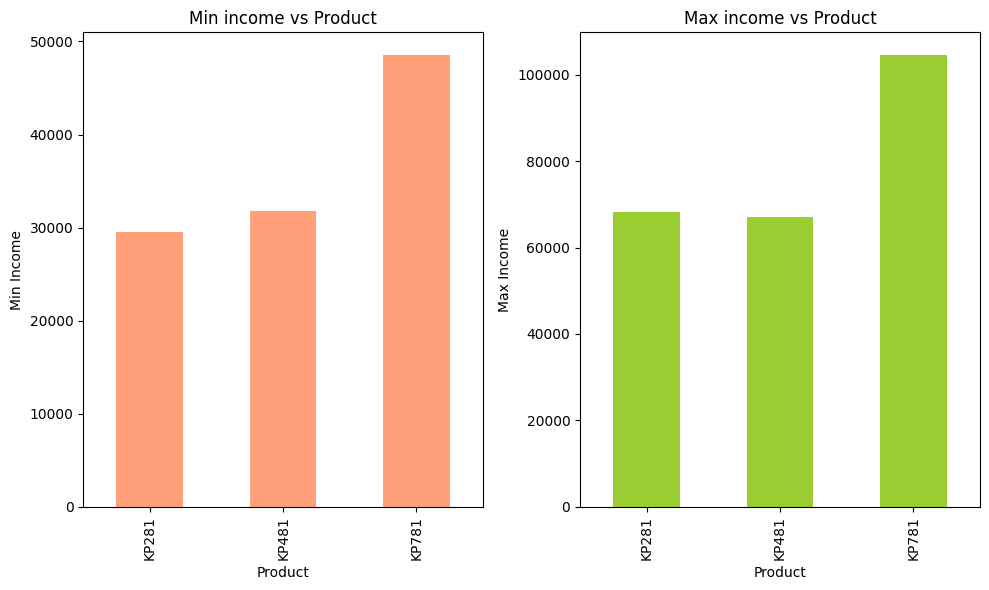

In [23]:
income_min = (df.groupby('Product')['Income'].min())
income_max = (df.groupby('Product')['Income'].max())
fig,axes = plt.subplots(1,2,figsize=(10,6))
income_min.plot(kind='bar',ax = axes[0],color='lightsalmon')
axes[0].set_title('Min income vs Product')
axes[0].set_xlabel('Product')
axes[0].set_ylabel('Min Income')
income_max.plot(kind='bar',ax = axes[1],color='yellowgreen')
axes[1].set_title('Max income vs Product')
axes[1].set_xlabel('Product')
axes[1].set_ylabel('Max Income')
plt.tight_layout()
plt.show()

**Observation:**

The income difference between the customers buying Entry level machines and mid level machine is very less. Sales people can upsell the product KP481.

Outlier Analysis

In [24]:
for col in num_cols:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  outliers = df[(df[col] < lower) | (df[col] > upper)]
  print(f'{col} : {len(outliers)} Outliers detected ({len(outliers)/len(df) * 100:.2f}%)')
  print(f'Range : [{lower : .2f},{upper:.2f}]')

Age : 5 Outliers detected (2.78%)
Range : [ 10.50,46.50]
Education : 4 Outliers detected (2.22%)
Range : [ 11.00,19.00]
Usage : 9 Outliers detected (5.00%)
Range : [ 1.50,5.50]
Fitness : 2 Outliers detected (1.11%)
Range : [ 1.50,5.50]
Income : 19 Outliers detected (10.56%)
Range : [ 22144.88,80581.88]
Miles : 13 Outliers detected (7.22%)
Range : [-7.12,187.88]


**Obervation**

Age, Education and Usage are having very few outliers.

Income and Miles are having more outliers.

Only a few of our customers run more than 180 miles per week

In [30]:
# BUSINESS INTERPRETATION TEMPLATE
def generate_business_insights(df):
    """
    Generate actionable business insights from the probability analysis.
    """

    print("\n" + "="*70)
    print("📋 BUSINESS INSIGHTS & RECOMMENDATIONS")
    print("="*70)

    # Gender Analysis
    print("\n🚹🚺 GENDER INSIGHTS:")
    print("-" * 50)

    gender_product = pd.crosstab(df['Product'], df['Gender'], normalize='index')

    kp781_male_pct = gender_product.loc['KP781', 'Male'] * 100
    kp281_male_pct = gender_product.loc['KP281', 'Male'] * 100

    print(f"""
    • KP781 (Advanced) shows strong male preference: {kp781_male_pct:.1f}% male buyers
    • KP281 (Entry-level) is gender-balanced: {kp281_male_pct:.1f}% male

    RECOMMENDATION:
    - Target premium treadmill marketing toward male fitness enthusiasts
    - Explore untapped female market for advanced treadmills with tailored messaging
    - Entry-level marketing should remain gender-neutral
    """)

    # Income Analysis
    print("\n💰 INCOME INSIGHTS:")

    income_by_product = df.groupby('Product')['Income'].agg(['mean', 'min', 'max'])

    print(f"""
    Product Income Profiles:
    • KP281: Avg ${income_by_product.loc['KP281', 'mean']:,.0f} (Range: ${income_by_product.loc['KP281', 'min']:,} - ${income_by_product.loc['KP281', 'max']:,})
    • KP481: Avg ${income_by_product.loc['KP481', 'mean']:,.0f} (Range: ${income_by_product.loc['KP481', 'min']:,} - ${income_by_product.loc['KP481', 'max']:,})
    • KP781: Avg ${income_by_product.loc['KP781', 'mean']:,.0f} (Range: ${income_by_product.loc['KP781', 'min']:,} - ${income_by_product.loc['KP781', 'max']:,})

    RECOMMENDATION:
    - Position KP781 as a premium product for high-income professionals
    - KP281 and KP481 target similar income segments; differentiate on features
    """)

    # Fitness Level Analysis
    print("\n🏋️ FITNESS LEVEL INSIGHTS:")


    fitness_product = pd.crosstab(df['Product'], df['Fitness'], normalize='index')

    kp781_high_fitness = (fitness_product.loc['KP781', 4] + fitness_product.loc['KP781', 5]) * 100
    kp281_avg_fitness = fitness_product.loc['KP281', 3] * 100

    print(f"""
    • KP781 buyers are fitness enthusiasts: {kp781_high_fitness:.1f}% rate fitness 4-5
    • KP281 buyers have average fitness: {kp281_avg_fitness:.1f}% rate fitness as 3

    RECOMMENDATION:
    - Market KP781 through fitness influencers and gym partnerships
    - Position KP281 as "beginner-friendly" for fitness newcomers
    - Create upgrade path marketing from KP281 → KP781 as fitness improves
    """)

    # Usage Pattern Analysis
    print("\n📅 USAGE PATTERN INSIGHTS:")


    usage_by_product = df.groupby('Product')['Usage'].mean()

    print(f"""
    Average Weekly Usage:
    • KP281: {usage_by_product['KP281']:.1f} days/week
    • KP481: {usage_by_product['KP481']:.1f} days/week
    • KP781: {usage_by_product['KP781']:.1f} days/week

    RECOMMENDATION:
    - KP781 warranty/service should account for higher usage wear
    - Bundle KP281 with beginner workout programs (3 days/week)
    - KP781 buyers may value advanced tracking and workout variety features
    """)


In [31]:
generate_business_insights(df)


📋 BUSINESS INSIGHTS & RECOMMENDATIONS

🚹🚺 GENDER INSIGHTS:
--------------------------------------------------

    • KP781 (Advanced) shows strong male preference: 82.5% male buyers
    • KP281 (Entry-level) is gender-balanced: 50.0% male

    RECOMMENDATION:
    - Target premium treadmill marketing toward male fitness enthusiasts
    - Explore untapped female market for advanced treadmills with tailored messaging
    - Entry-level marketing should remain gender-neutral
    

💰 INCOME INSIGHTS:

    Product Income Profiles:
    • KP281: Avg $46,418 (Range: $29,562 - $68,220)
    • KP481: Avg $48,974 (Range: $31,836 - $67,083)
    • KP781: Avg $75,442 (Range: $48,556 - $104,581)

    RECOMMENDATION:
    - Position KP781 as a premium product for high-income professionals
    - KP281 and KP481 target similar income segments; differentiate on features
    

🏋️ FITNESS LEVEL INSIGHTS:

    • KP781 buyers are fitness enthusiasts: 90.0% rate fitness 4-5
    • KP281 buyers have average fitnes

**Actionable Insights:**

Model KP281 is the best-selling product. 44.0% of all treadmill sales go to model KP281.

The majority of treadmill customers fall within the $ 45,000 - $ 80,000 income bracket.

83% of treadmills are bought by individuals with incomes between $ 35,000 and $ 85,000

There are only 8% of customers with incomes below $ 35000 who buy treadmills.

88% of treadmills are purchased by customers aged 20 to 40.

Miles and Fitness & Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.

KP781 is the only model purchased by a customer who has more than 20 years of education and an income of over $ 85,000.

With Fitness level 4 and 5, the customers tend to use high-end treadmills and the average number of miles is above 150 per week

**Recommendations:**

KP281 & KP481 are popular with customer income of $ 45,000 - $ 60,000 and can be offered by these companies as affordable models.

KP781 should be marketed as a Premium Model and marketing it to high income groups and educational over 20 years market segments could result in more sales.

The KP781 is a premium model, so it is ideally suited for sporty people who have a high average weekly mileage and can be afforded by the high income customers.

Aerofit should conduct market research to determine if it can attract customers with income under $ 35,000 to expand its customer base.

In [32]:
# FINAL CUSTOMER PROFILE SUMMARY TABLE

def create_customer_profile_table(df):
    """
    Create a summary table of customer profiles for each product.
    """

    profiles = []

    for product in ['KP281', 'KP481', 'KP781']:
        subset = df[df['Product'] == product]

        profile = {
            'Product': product,
            'Segment': 'Entry' if product == 'KP281' else ('Mid' if product == 'KP481' else 'Advanced'),
            'Count': len(subset),
            'Market_Share_%': len(subset) / len(df) * 100,
            'Avg_Age': subset['Age'].mean(),
            'Age_Range': f"{subset['Age'].min()}-{subset['Age'].max()}",
            'Primary_Gender': subset['Gender'].mode()[0],
            'Male_%': (subset['Gender'] == 'Male').mean() * 100,
            'Avg_Income': subset['Income'].mean(),
            'Income_Range': f"${subset['Income'].min():,}-${subset['Income'].max():,}",
            'Avg_Education_Yrs': subset['Education'].mean(),
            'Primary_Marital': subset['MaritalStatus'].mode()[0],
            'Avg_Usage_Days': subset['Usage'].mean(),
            'Avg_Fitness_Level': subset['Fitness'].mean(),
            'Avg_Miles_Week': subset['Miles'].mean()
        }
        profiles.append(profile)

    profile_df = pd.DataFrame(profiles)

    print("\n" + "="*70)
    print("📊 CUSTOMER PROFILE SUMMARY BY PRODUCT")
    print("="*70)

    # Display key metrics
    display_cols = ['Product', 'Segment', 'Count', 'Market_Share_%', 'Avg_Age',
                    'Male_%', 'Avg_Income', 'Avg_Fitness_Level', 'Avg_Usage_Days']

    print(profile_df[display_cols].to_string(index=False))

    return profile_df

In [33]:
profile_table = create_customer_profile_table(df)


📊 CUSTOMER PROFILE SUMMARY BY PRODUCT
Product  Segment  Count  Market_Share_%  Avg_Age    Male_%  Avg_Income  Avg_Fitness_Level  Avg_Usage_Days
  KP281    Entry     80       44.444444    28.55 50.000000   46418.025             2.9625        3.087500
  KP481      Mid     60       33.333333    28.90 51.666667   48973.650             2.9000        3.066667
  KP781 Advanced     40       22.222222    29.10 82.500000   75441.575             4.6250        4.775000


Predictive Model

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Prepare data
X = df.drop('Product',axis=1)
X = pd.get_dummies(X,drop_first = True)
Y = df['Product'].map({'KP281':0,'KP481':1,'KP781':2})

#Train test split
X_train,X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2)
rf = RandomForestClassifier(n_estimators = 100, random_state=42,class_weight='balanced')

rf.fit(X_train, y_train)

#Feature importance
importance = pd.DataFrame({
    'feature' : X.columns,
    'importance' : rf.feature_importances_
}).sort_values('importance',ascending=False).head()
print('Top 10 Predictors')
print(importance)

Top 10 Predictors
     feature  importance
5      Miles    0.224052
4     Income    0.198955
3    Fitness    0.164303
0        Age    0.129526
1  Education    0.114312


              precision    recall  f1-score   support

           0       0.62      0.44      0.52        18
           1       0.38      0.55      0.44        11
           2       1.00      1.00      1.00         7

    accuracy                           0.58        36
   macro avg       0.66      0.66      0.65        36
weighted avg       0.62      0.58      0.59        36



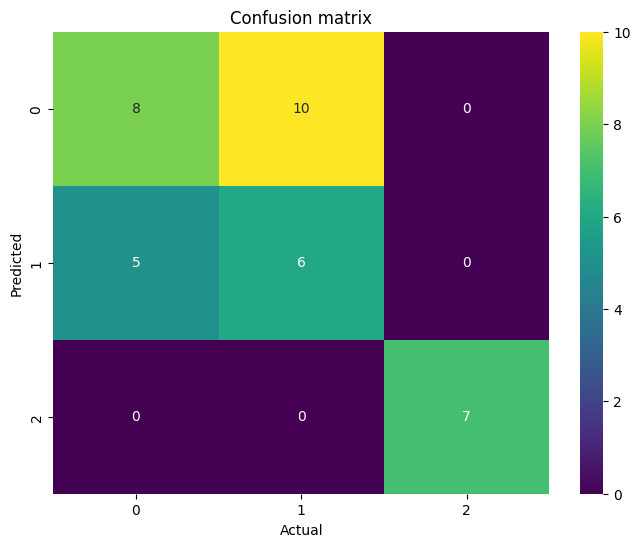

In [35]:
#Model training and prediction
rf.fit(X_train, y_train)
rf.score(X_test, y_test)
y_pred = rf.predict(X_test)

#Accuracy score
test_accuracy = accuracy_score(y_test, y_pred)

#Confusionmatrix
cm = confusion_matrix(y_test, y_pred)

#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt='g',cmap='viridis')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Confusion matrix')

#classification report
print(classification_report(y_test,y_pred))